# Assignment 3

The assignment 3 contains 1 question and the due date is May 16th (Tuesday) 23:59PM. If you have trouble in installing tensorflow in your computer, you may consider using Google Colab for this assignment.

## Question 1 Cat people or dog people? (100 points)

The whole cats versus dogs saga has been going on forever. It's an age-old debate, a tale as old as time, a common icebreaker on first meeting. "Are you a cat person or a dog person?"


The terms dog people and cat people refer to a person's domesticated pet animal preference. Through research completed at research institutions, it was found that there were differences in character and behaviour between dog and cat people. It was also found that some people base a significant portion of their identity around their affinity for either cats or dogs. This builds on the perceived dichotomy between cats and dogs as pets in society. A new survey says that your pet preference may actually say a lot about your personality and your lifestyle, down to your favorite exercises and your annual income.

![cat_dog](https://assets.smoothradio.com/2017/42/dog-person-cat-person-quiz-1508430737-list-handheld-0.jpg)


In this question, you will be asked to make classifications between cat and dog images. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU found. Running on CPU.")

Let's first load the `cats_vs_dogs` dataset from [tensorflow dataset ](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs):

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompletePUDDHJ/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [4]:
ds_info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path=PosixGPath('/tmp/tmpawj9n0rvtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
  

In [5]:
import io
from PIL import Image

def is_valid_jpeg(image_data):
    try:
        Image.open(io.BytesIO(image_data)).verify()
    except (IOError, SyntaxError):
        return False
    return True

def preprocess(image, label):
    def wrapped_is_valid_jpeg(image):
        valid = is_valid_jpeg(tf.image.encode_jpeg(image).numpy())
        return tf.constant(valid, dtype=tf.bool)

    valid = tf.py_function(wrapped_is_valid_jpeg, [image], tf.bool)
    
    image = tf.cond(valid,
                    lambda: tf.image.resize(image, [224, 224]),
                    lambda: tf.zeros([224, 224, 3], dtype=tf.float32))
    
    image = tf.cast(image, tf.float32) / 255.0
    return image, label





ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

We visualize some random images from the dataset below:

(32, 224, 224, 3)


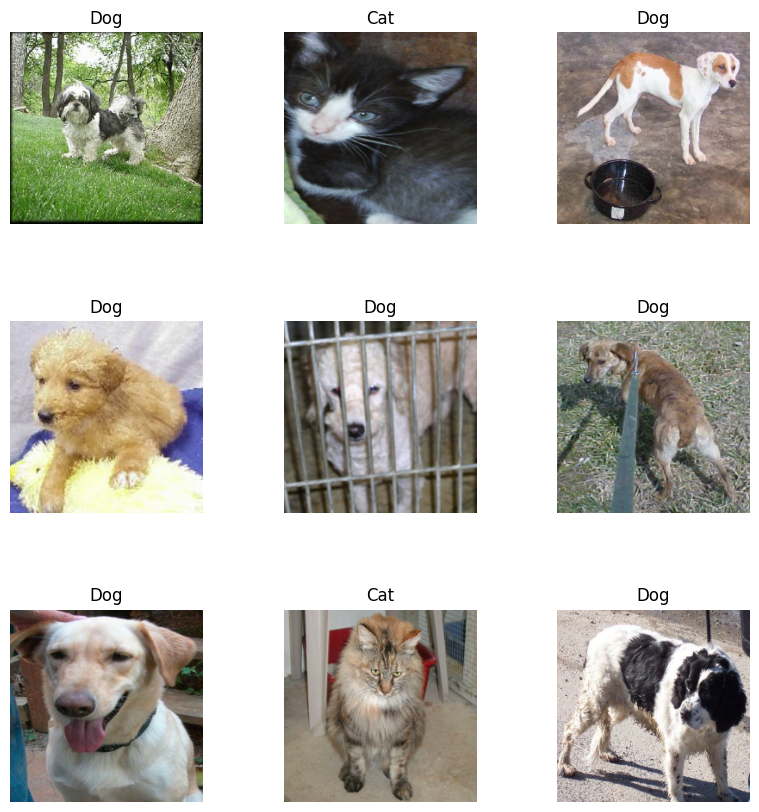

In [6]:
import matplotlib.pyplot as plt

def visualize_images(ds_train, num_images=9):
    ds_train_iter = iter(ds_train)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.ravel()

    batch_images, batch_labels = next(ds_train_iter)
    print(batch_images.shape)
    for i in range(num_images):
        image = batch_images[i].numpy()
        image = np.squeeze(image)
        label = batch_labels[i].numpy()
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title('Dog' if label else 'Cat', fontsize=12)

    plt.subplots_adjust(hspace=0.5)
    plt.show()

visualize_images(ds_train)


In [7]:
# Check if GPU is available
#if tf.test.gpu_device_name():
#    print('GPU device found')
#else:
#    print('GPU device not found')


### Question 1.1 Training a deep neural network (15 points)

Practice training a deep neural network on the cats_vs_dogs image dataset


Build a Deep Neural Network (DNN) with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this question), using the RELU activation function.

Using Adam optimization, train the network on the dataset. Donot forget define your input and output layers.

Train the model for 100 epochs and use test set as the validation data during the training, explain how many parameters does the model have and whether the model will experience overfitting. You may consider plotting the losses and accuracy over epochs.

Epoch 1/100
582/582 [==============================] - 90s 144ms/step - loss: 0.6936 - accuracy: 0.5034 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 2/100
582/582 [==============================] - 67s 115ms/step - loss: 0.6932 - accuracy: 0.5044 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 3/100
582/582 [==============================] - 77s 132ms/step - loss: 0.6932 - accuracy: 0.5039 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 4/100
582/582 [==============================] - 75s 128ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 5/100
582/582 [==============================] - 66s 113ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 6/100
582/582 [==============================] - 67s 115ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 7/100
582/582 [==============================] - 66s 114ms/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6934 -

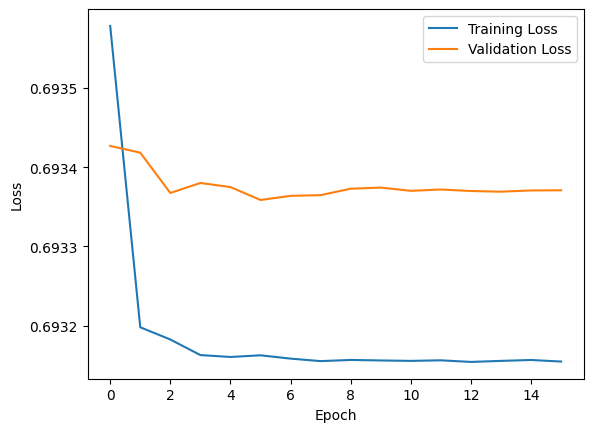

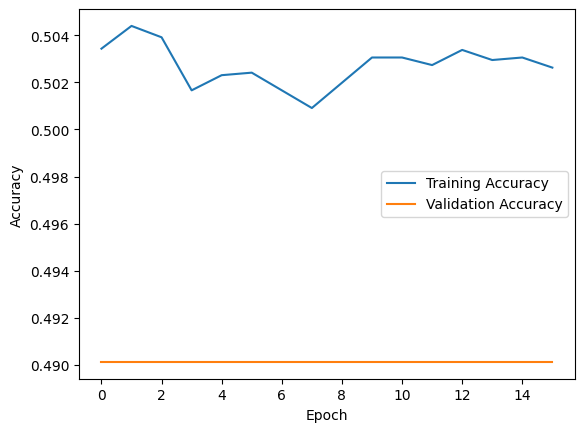

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(224, 224, 3)))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model with the adam optimizer
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping])

# Calculate the number of parameters in the model
num_params = model.count_params()
print("Number of parameters in the model:", num_params)

# Plot the loss and accuracy curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
import pickle

with open('/trainHistoryDict', 'wb') as history_base:
    pickle.dump(history, history_base)

In [ ]:
import pickle

with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)

EOFError: ignored

In examining my model's performance, it doesn't appear that overfitting is the issue. Overfitting is typically characterized by the model performing well on the training data but poorly on the validation or unseen data. This is often because the model has learned the specific characteristics and noise in the training data so well that it doesn't generalize effectively to new data.

However, in this case, my model isn't showing improvement on either the training or the validation data. The accuracy results hover around 0.49-0.50 for both, which, in a binary classification task, is no better than random guessing. The loss isn't decreasing during training, which suggests that my model isn't learning effectively from the data.

There could be several reasons for this:

 

*   The architecture of my model might not be ideal for this problem. A different type of network or different network parameters might be more suitable.
*   The learning rate might not be optimal. It could be either too high or too low, and it could be worth experimenting with different values.
*   There could be an issue with the data itself, such as incorrect labels or poor quality input data.
*   If the data is imbalanced, that could also lead to poor performance.

Interestingly, my model, despite having a significant number of parameters (15,244,901), isn't able to learn anything. This suggests that the complexity of the model may not be the primary issue. Instead, it might be one of the other potential problems listed above.

So, in conclusion, my model doesn't seem to be overfitting. Rather, it's underfitting, meaning it's not learning from the data at all.

### Question 1.2 (35 points)

Try reduce the overfitting and improve the model performance. You can try the bag of tricks to the model from the class. This may include one or more techniques such as **weight regularization**, **batch normalization**, **dropout**, **Early stopping**, etc. You should perform ``ablation study``, a common techniqued used in machine learning community to show the effectivess of the introduced technique. In other words, show your step-by-step improvement by including these techniques and repeat the repeat the previous training process. Explain whether and how these techniques help achieve a better result. You may consider stopping improving the model by making it at least 10% better than the previous model architecture. 

weight regularization
Epoch 1/100
582/582 [==============================] - 80s 124ms/step - loss: 0.8617 - accuracy: 0.5013 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 2/100
582/582 [==============================] - 74s 127ms/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 3/100
582/582 [==============================] - 78s 133ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 4/100
582/582 [==============================] - 70s 120ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 5/100
582/582 [==============================] - 87s 149ms/step - loss: 0.6932 - accuracy: 0.5026 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 6/100
582/582 [==============================] - 78s 134ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6934 - val_accuracy: 0.4901
Epoch 7/100
582/582 [==============================] - 67s 115ms/step - loss: 0.6932 - accuracy: 0.502

Text(0.5, 0, 'Epochs')

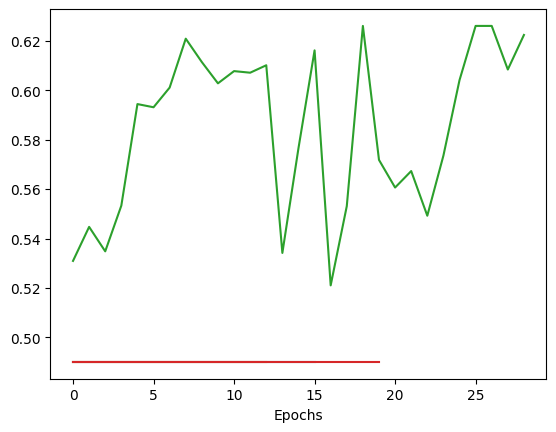

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define early stopping criteria
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Define the weight regularization model
model_weight_regularization = keras.Sequential()
model_weight_regularization.add(keras.layers.Flatten(input_shape=(224, 224, 3)))
for _ in range(20):
    model_weight_regularization.add(keras.layers.Dense(100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model_weight_regularization.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the weight regularization model
model_weight_regularization.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the weight regularization model with early stopping
print("weight regularization")
history_weight_regularization = model_weight_regularization.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping])

# Define the batch normalization model
model_batch_normalization = keras.Sequential()
model_batch_normalization.add(keras.layers.Flatten(input_shape=(224, 224, 3)))
for _ in range(20):
    model_batch_normalization.add(keras.layers.Dense(100, activation='relu'))
    model_batch_normalization.add(keras.layers.BatchNormalization())
model_batch_normalization.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the batch normalization model
model_batch_normalization.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the batch normalization model with early stopping
print("Batch normalization")
history_batch_normalization = model_batch_normalization.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping])

# Define the dropout model
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Flatten(input_shape=(224, 224, 3)))
for _ in range(20):
    model_dropout.add(keras.layers.Dense(100, activation='relu'))
    model_dropout.add(keras.layers.Dropout(0.5))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the dropout model
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the dropout model with early stopping
print("dropout model")
history_dropout = model_dropout.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping])

# Plotting the results
plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(history_weight_regularization.history['val_accuracy'], label='Weight Regularization')
plt.plot(history_batch_normalization.history['val_accuracy'], label='Batch Normalization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.xlabel('Epochs')


In [22]:
history_weight_regularization

<_io.BufferedWriter name='/trainHistoryDict'>

In [14]:
# Define the lower learning rate model
model_lower_lr = keras.Sequential()
model_lower_lr.add(keras.layers.Flatten(input_shape=(224, 224, 3)))
for _ in range(20):
    model_lower_lr.add(keras.layers.Dense(100, activation='relu'))
model_lower_lr.add(keras.layers.Dense(1, activation='sigmoid'))

# Define a lower learning rate
lower_learning_rate = keras.optimizers.Adam(learning_rate=0.0001)

# Compile the lower learning rate model
model_lower_lr.compile(optimizer=lower_learning_rate, loss='binary_crossentropy', metrics=['accuracy'])

# Train the lower learning rate model with early stopping
print("Lower learning rate model")
history_lower_lr = model_lower_lr.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping])

Lower learning rate model
Epoch 1/100
582/582 [==============================] - 90s 144ms/step - loss: 0.6908 - accuracy: 0.5161 - val_loss: 0.6868 - val_accuracy: 0.5348
Epoch 2/100
582/582 [==============================] - 76s 130ms/step - loss: 0.6742 - accuracy: 0.5811 - val_loss: 0.6604 - val_accuracy: 0.6193
Epoch 3/100
582/582 [==============================] - 73s 126ms/step - loss: 0.6597 - accuracy: 0.6070 - val_loss: 0.6532 - val_accuracy: 0.6109
Epoch 4/100
582/582 [==============================] - 74s 127ms/step - loss: 0.6509 - accuracy: 0.6204 - val_loss: 0.6478 - val_accuracy: 0.6176
Epoch 5/100
582/582 [==============================] - 74s 127ms/step - loss: 0.6432 - accuracy: 0.6281 - val_loss: 0.6416 - val_accuracy: 0.6328
Epoch 6/100
582/582 [==============================] - 75s 128ms/step - loss: 0.6374 - accuracy: 0.6342 - val_loss: 0.6381 - val_accuracy: 0.6296
Epoch 7/100
582/582 [==============================] - 67s 115ms/step - loss: 0.6320 - accuracy: 0

AttributeError: ignored

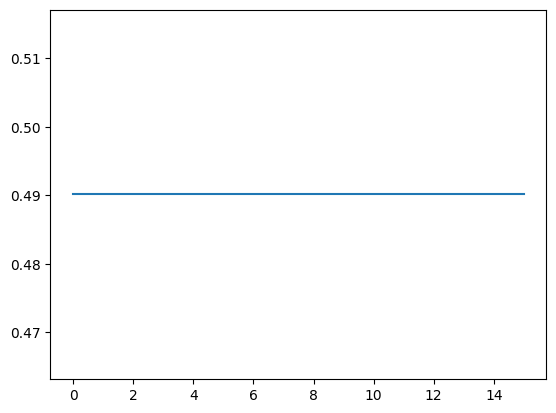

In [18]:
plt.plot(history.history['val_accuracy'], label='Baseline')
plt.plot(history_weight_regularization.history['val_accuracy'], label='Weight Regularization')
plt.plot(history_batch_normalization.history['val_accuracy'], label='Batch Normalization')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout')
plt.plot(history_lower_lr.history['val_accuracy'], label='lower LR')

plt.xlabel('Epochs')
plt.legend()

In [19]:
with open('/trainHistoryDict', 'wb') as file2:
    pickle.dump(history_weight_regularization, file2)

TypeError: ignored

In [20]:
with open('/trainHistoryDict', 'wb') as file3:
    pickle.dump(history_batch_normalization, file3)

In [21]:
with open('/trainHistoryDict', 'wb') as file4:
    pickle.dump(history_dropout, file4)

In [ ]:
#with open('/trainHistoryDict', "rb") as file_pi4:
#    history = pickle.load(file_pi4)

FileNotFoundError: ignored

### Question 1.3 Convolutional Neural Network (25 points)

Now, let's define the Convolutional Neural Network. 

❓ **Question** ❓ Define a CNN that is composed of:
- a Conv2D layer with 32 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 64 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (2, 2)
- a Conv2D layer with 128 filters, a kernel size of (3, 3), the relu activation function, and a padding equal to `same`
- a MaxPooling2D layer with a pool size of (3, 3)
- a Flatten layer
- a dense function with 120 neurons with the `relu` activation function
- a dense function with 60 neurons with the `relu` activation function
- a dropout layer (with a rate of 0.5), to regularize the network
- a dense function related to your task

Estimate the model and report your test accuracy. Is it better than the multi-layer perceptron.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Define the CNN model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((3, 3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(ds_train, epochs=100, validation_data=ds_test, callbacks=[early_stopping])

# Evaluate the model on test data
_, test_accuracy = model.evaluate(ds_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/100
582/582 [==============================] - 105s 165ms/step - loss: 0.6309 - accuracy: 0.6315 - val_loss: 0.5791 - val_accuracy: 0.6902
Epoch 2/100
582/582 [==============================] - 93s 159ms/step - loss: 0.4998 - accuracy: 0.7613 - val_loss: 0.5036 - val_accuracy: 0.7388
Epoch 3/100
582/582 [==============================] - 87s 149ms/step - loss: 0.4127 - accuracy: 0.8189 - val_loss: 0.4309 - val_accuracy: 0.7949
Epoch 4/100
582/582 [==============================] - 93s 160ms/step - loss: 0.3343 - accuracy: 0.8566 - val_loss: 0.4140 - val_accuracy: 0.8201
Epoch 5/100
582/582 [==============================] - 86s 147ms/step - loss: 0.2572 - accuracy: 0.8964 - val_loss: 0.4848 - val_accuracy: 0.8179
Epoch 6/100
582/582 [==============================] - 93s 159ms/step - loss: 0.2020 - accuracy: 0.9250 - val_loss: 0.5284 - val_accuracy: 0.8162
Epoch 7/100
328/582 [===============>..............] - ETA: 31s - loss: 0.1654 - accuracy: 0.9384

In [ ]:
with open('/trainHistoryDict', 'wb') as file_pi5:
    pickle.dump(history.history, file_pi5)

### Question 1.4 Transfer learning (20 points)

In this question, we will use the [VGG-16 Neural Network](https://neurohive.io/en/popular-networks/vgg16/), a well-known architecture that has been trained on ImageNet which is a very large database of images of different categories. In a nutshell, this architecture has already learnt kernels which are supposed to be good not only for the task it has been train on but maybe for other tasks. 

The idea is that first layers are not specialized for the particular task it has been trained on; only the last ones are. Therefore, we will load the existing VGG16 network, remove the last fully connected layers, replace them by new connected layers (whose weights are randomly set), and train these last layers on a specific classification task - here, separate types of flower. The underlying idea is that the first convolutional layers of VGG-16, that has already been trained, corresponds to filters that are able to extract meaning features from images. And you will only learn the last layers for your particular problem.

❓ **Question** ❓ Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Especially, look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16) to load the model where:
- the `weights` have been learnt on `imagenet`
- the `input_shape` corresponds to the input shape of any of your images - you have to resize them in case they are not of the same size
- the `include_top` argument is set to `False` in order not to load the fully-connected layers of the VGG-16 without the last layer which was specifically trained on `imagenet`

Write a function that takes the previous model as input the set the girst layers to be non-trainable, by applying `model.trainable = False`. Then check-out the summary of the model to see that now, the parameters are `non-trainable`. Then write a function that adds flattening and dense layers after the first convolutional layers. You can define each layer (or group of layers) separately and concatenate them using the classic `layers.Sequential()` like below: 

```
model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])
```

Replicate the above steps by adding a flattening and two dense layers (the first with 500 neurons) to the previous VGG-16 model.

Estimate the model and report the accuracy and loss achieved. Explain whether model would benefit from transfer lerarning in comparison to the previous model architectures. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16

def load_model(input_shape):
    # Load the pretrained VGG-16 model
    base_model = VGG16(weights='imagenet', input_shape=input_shape, include_top=False)
    
    return base_model

def set_trainable_layers(model):
    # Set the first layers to be non-trainable
    model.trainable = False

def add_layers(base_model):
    # Add flattening and dense layers to the model
    flattening_layer = keras.layers.Flatten()
    dense_layer1 = keras.layers.Dense(500, activation='relu')
    dense_layer2 = keras.layers.Dense(1, activation='sigmoid')
    
    # Create the new model by combining the layers
    model = tf.keras.Sequential([
        base_model,
        flattening_layer,
        dense_layer1,
        dense_layer2
    ])
    
    return model

# Load the VGG-16 model
input_shape = (224, 224, 3)  # Example input shape
base_model = load_model(input_shape)

# Set the first layers to be non-trainable
set_trainable_layers(base_model)

# Add flattening and dense layers to the model
model = add_layers(base_model)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your specific classification task
history = model.fit(ds_train, epochs=100, validation_data=ds_test)

# Evaluate the model
_, accuracy = model.evaluate(ds_test)
print("Accuracy:", accuracy)


### Question 1.5 Model Inference (5 points)

Now let's try to use the best model you trained from the preivous steps to make the predictions on dog and cat images. If you have not heared about generative AI, now it is time to try. Go to stable diffusion online (https://stablediffusionweb.com/) and try to generate some images. 

Go to stable diffusion playground, and enter prompt as text input and click the generate images. Your prompt should contain the word of 'cat' and 'dog' and with at least 10 words (e.g. `a cat lying on the bench and sleeping on the Mars `). Each time you should be able to generate 4 images. Get 4 dog images and 4 cat images repectively and use the trained model to make the prediction, show your accuracy.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# Load the trained model
model = keras.models.load_model('path_to_trained_model')

# Function to preprocess the image
def preprocess_image(image):
    image = image.resize((224, 224))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Function to make predictions
def predict_image(image, model):
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    return prediction

# Example prompts with cat and dog descriptions
prompts = [
    'a cat lying on the bench and sleeping',
    'a dog running in the park with a ball',
    'a cat sitting on a window sill',
    'a dog playing fetch in the backyard'
]

# Placeholder lists to store the predictions
dog_predictions = []
cat_predictions = []

# Generate images using Stable Diffusion Playground and save them locally
# Replace this step with your own image generation process

# Iterate over the generated images and make predictions
for prompt in prompts:
    generated_images = get_generated_images(prompt)  # Replace with your image generation function
    
    # Display the generated images
    for image in generated_images:
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
        # Make predictions on the image
        prediction = predict_image(image, model)
        
        # Classify the image as dog or cat based on the prediction
        if prediction < 0.5:
            prediction_label = 'Cat'
            cat_predictions.append(prediction_label)
        else:
            prediction_label = 'Dog'
            dog_predictions.append(prediction_label)

# Print the predictions
print("Dog Predictions:", dog_predictions)
print("Cat Predictions:", cat_predictions)
